In [1]:
from grading_tools import *

# Exercises

## Exercise

You can compute the Cholesky decomposition of a matrix using the Python function `numpy.linalg.cholesky`. Use this to compute
the Cholesky decomposition of 
$$
\Sigma = \left( \begin{array}{cc}
3 & 1 \\
1 & 2
\end{array}
\right)$$
and check your answer.

Use this to draw a scatter plot of the multivariate normal distribution with mean $0$ and covariance matrix $\Sigma$.

To check your answer using the automated tests, create a $2 \times 100000$ matrix whose columns contain $100000$ samples from such a distribution and call this matrix `sample`.

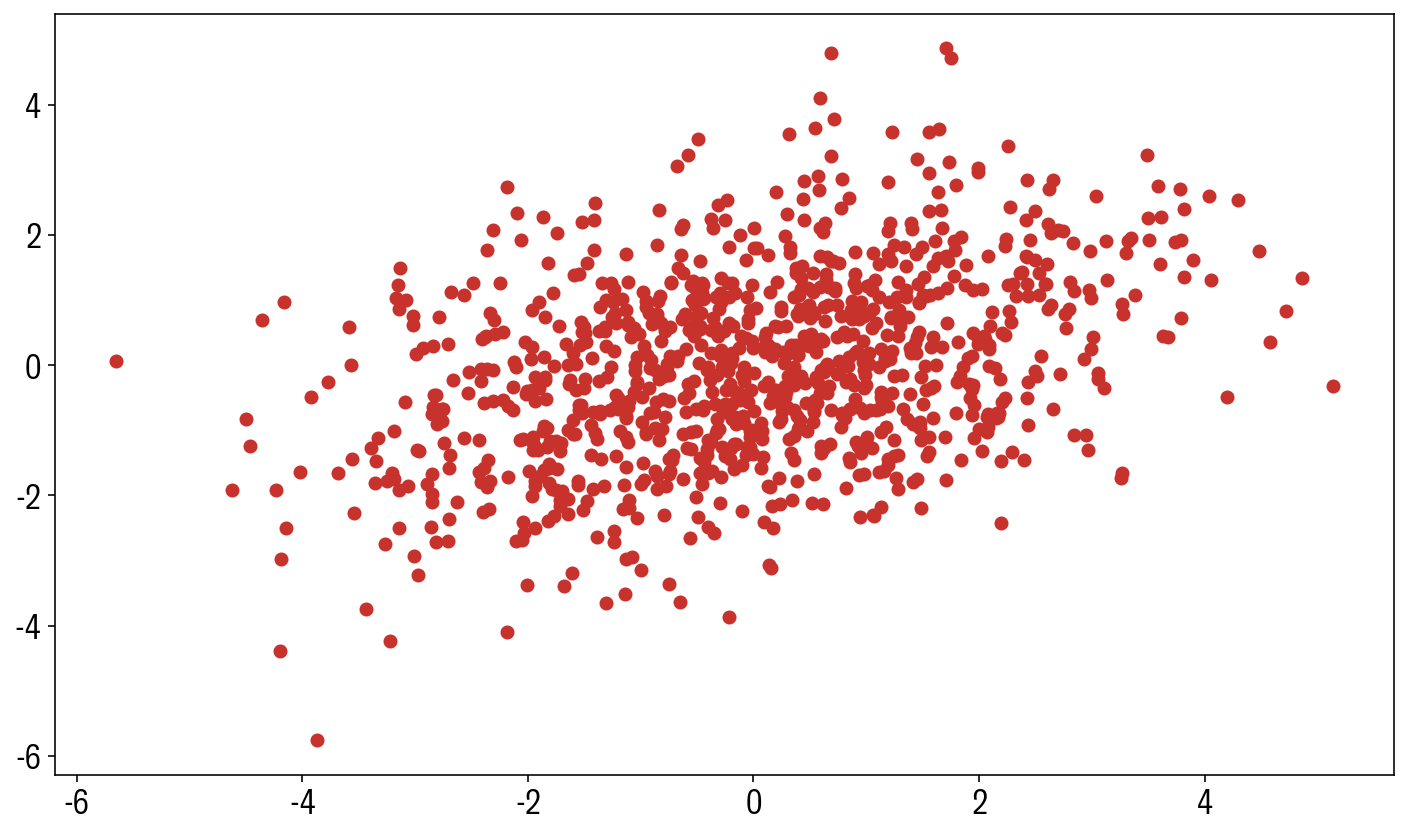

In [2]:
import numpy as np
import matplotlib.pyplot as plt
### BEGIN SOLUTION
L = np.linalg.cholesky( [[3, 1], [1,2]])
sample = L @ np.random.randn(2,1000)
plt.scatter( sample[0,:],sample[1,:])

sample = L @ np.random.randn(2,100000)
### END SOLUTION

In [3]:
expected = np.array( [[3,1],[1,2]] )
assert sample.shape==(2,100000), "Wrong size sample"
assert np.mean(sample[0,:])<0.05
assert np.mean(sample[1,:])<0.05
actual = np.cov(sample, rowvar=True)
assert np.linalg.norm( actual - expected )<0.1
auto_marking_message()

Auto marking message: 😍 Correct


## Exercise

Compute the Cholesky decomposition of the matrix
$$
\Sigma = \left( \begin{array}{cc}
1 & \rho \\
\rho & 1
\end{array}
\right)$$
analytically. Write a function `my_chol` which takes a single parameter `rho` and returns the Cholesky decomposition of
this matrix computed using your formula.

What condition do you need on $\rho$ for this matrix to be positive-definite?

In [4]:
import numpy as np
from math import *

def my_chol( rho ):
    ### BEGIN SOLUTION
    return np.array([[1,0],[rho, sqrt(1-rho**2)]])
    ### END SOLUTION

In [5]:
rho = 0.6
L = my_chol( rho )
assert L[0,1]==0, "Must be lower triangular"
assert L[0,0]>0, "Must have a positive diagonal"
assert L[1,1]>0, "Must have a positive diagonal"
assert np.linalg.norm(L @ L.transpose()-np.array([[1,rho],[rho,1]]))<0.0001

## Exercise

Show that pseudo square roots are far from unique by finding 4 lower triangular pseudo square roots of the matrix
$$
\Sigma = \left( \begin{array}{cc}
1 & \rho \\
\rho & 1
\end{array}
\right)$$
and one upper triangular pseudo square root.

Write a function `find_5_pseudo_square_roots` which returns a list
of the 5 roots you have found, starting with the lower traingular roots.

In [6]:
def find_5_pseudo_square_roots( rho ):
    ### BEGIN SOLUTION ###
    r1 = np.array([[1,0],[rho, sqrt(1-rho**2)]])
    r2 = np.array([[-1,0],[-rho, sqrt(1-rho**2)]])
    r3 = np.array([[1,0],[rho, -sqrt(1-rho**2)]])
    r4 = np.array([[-1,0],[-rho, -sqrt(1-rho**2)]])
    r5 = np.array([[sqrt(1-rho**2),rho],[0, 1]])
    return [r1,r2,r3,r4,r5]
    ### END SOLUTION

In [7]:
rho = 0.3
roots = find_5_pseudo_square_roots( 0.3 )
square = np.array([[1,rho],[rho,1]])
assert len(roots)==5
d = {}
for i in range(0,5):
    r = roots[i]
    key = str(roots[i])
    d[key] = i
    assert (np.linalg.norm(r @ r.transpose() - square))<0.000001
for i in range(0,4):    
    assert abs(roots[i][0,1])<0.000001
assert abs(roots[4][1,0])<0.000001
assert len(d)==5
auto_marking_message()

Auto marking message: 🌟 Correct


## Exercise

What gaps do you think there are in the proof of the existence of the Cholesky decomposition given in lectures?

*Solution:*

* The argument in the lectures is very vague saying "continuing in this way" rather than giving a fully rigorous induction proof.
* The argument in the lectures failed to check that all the square roots are of non-negative quantities.

## Exercise

Implement your own `cholesky` function using the following formulae:

$$ \ell_{jj} = \sqrt{ s_{jj} - \sum_{k=1}^{j-1} \ell_{jk}^2 } $$
and
$$ \ell_{ij} = \frac{1}{\ell_{jj}} \left( s_{i j} - \sum_{k=1}^{j-1} \ell_{ik} \ell_{jk} \right)$$
if $i>j$, where $\ell_{ij}$ are the components of $L$ and $s_{ij}$ are the components of $\Sigma$ and $L$ is the Cholesky decomposition of the positive definite symmetric matrix $\Sigma$.

Note that this formula has been written using
the mathematics convention that indices start at $1$. To change to the maths convention simply change the term $k=1$ to $k=0$
and the formulae will still hold.

In [8]:
def cholesky(s):
    ### BEGIN SOLUTION
    n = s.shape[0]
    l = np.zeros((n,n))
    for j in range(0,n):
        tot = s[j,j]
        for k in range(0,j):
            tot = tot - l[j,k]**2
        l[j,j] = sqrt(tot)
        for i in range(j+1,n):
            tot = s[i,j]
            for k in range(0,j):
                tot = tot - l[i,k]*l[j,k]
            l[i,j] = 1/l[j,j]*tot
    return l
    ### END SOLUTION

In [9]:
rho = 0.6
L = cholesky( np.array([[1,rho],[rho,1]]) )
assert L[0,1]==0, "Must be lower triangular"
assert L[0,0]>0, "Must have a positive diagonal"
assert L[1,1]>0, "Must have a positive diagonal"
assert np.linalg.norm(L @ L.transpose()-np.array([[1,rho],[rho,1]]))<0.0001
L = np.array([[1,0,0],[2,3,0],[4,5,6]])
S = L @ L.transpose()
assert np.linalg.norm( cholesky(S)-L )<0.0001
auto_marking_message()

Auto marking message: ✔ Correct


## Further Reading

We now give a complete proof of the existence of the Cholesky decomposition of a positive-definite symmetric matrix $\Sigma$.

**Proof:**

Suppose as an induction hypothesis that the result is true for $(n-1) \times (n-1)$ matrices.
We write $\Sigma$ in block diagonal form as
$$
\Sigma = 
\left( \begin{array}{c|c}
\Sigma_{n-1} & v_{n-1} \\ \hline
v_{n-1}^T & s
\end{array}
\right)
$$
where $\Sigma_{n-1}$ is an $(n-1)\times(n-1)$ symmetric matrix, $v_{n-1}$ is a vector
of length $(n-1)$ and $s$ is a scalar.

We now define $L$ by
$$
L = 
\left( 
\begin{array}{c|c}
L_{n-1} & 0 \\ \hline
w_{n-1}^T & w
\end{array}
\right)
$$

where $w_{n-1}$ is some $n$ vector to be determined, and $w$ is a scalar
to be determined. We require that $L_{n-1}$ is lower triangular with positive diagonal and that
$$
L L^T = \Sigma.
$$
This last condition is equivalent to the three conditions
\begin{equation}
L_{n-1} L_{n-1}^T = \Sigma_{n-1}, 
\end{equation}
\begin{equation}
L_{n-1} w_{n-1}= v_{n-1}
\qquad (1)
\end{equation}
and
\begin{equation}
w_{n-1}^T w_{n-1} + w^2 = s.
\end{equation}
It is easy to check that $S_{n-1}$ is positive definite. So there is a unique
choice for $L_{n-1}$ by our induction hypothesis.

Since $L_{n-1}$ is lower triangular with positive diagonal, it has a non-zero
determinant and so is invertible. Hence there is a unique $w_{n-1}$ solving
(1). (Indeed this equation will already be in echelon form so it is quick and easy to solve). We now require that:
$$
w^2 = s - w_{n-1}^T w_{n-1}.
$$
There will be a unique positive solution to this equation if and only if
$$
s - w_{n-1}^T w_{n-1} > 0.
$$
To see that this inequality will hold, we define a vector $v$ in block diagonal
form by:
$$
v = \left(
\begin{array}{c}
-(L_{n-1}^T)^{-1} w_{n-1} \\ \hline
1
\end{array}
\right)
$$
we know that $v^T \Sigma v > 0$ as $\Sigma$ is positive definite. We compute

$$
\begin{split}
v^T \Sigma v &= \left(
\begin{array}{c|c}
-w_{n-1} (L_{n-1})^{-1}  & 1
\end{array}
\right)
\left( \begin{array}{c|c}
\Sigma_{n-1} & v_{n-1} \\ \hline
v_{n-1}^T & s
\end{array}
\right)
\left(
\begin{array}{c}
-(L_{n-1}^T)^{-1} w_{n-1} \\ \hline
1
\end{array}
\right) \\
&= \left(
\begin{array}{c|c}
-w_{n-1} (L_{n-1})^{-1}  & 1
\end{array}
\right)
\left( \begin{array}{c|c}
L_{n-1} L_{n-1}^T & L_{n-1} w_{n-1} \\ \hline
w_{n-1}^T L_{n-1}^T & s
\end{array}
\right)
\left(
\begin{array}{c}
-(L_{n-1}^T)^{-1} w_{n-1} \\ \hline
1
\end{array}
\right) \\
&= \left(
\begin{array}{c|c}
-w_{n-1} (L_{n-1})^{-1}  & 1
\end{array}
\right)
\left( \begin{array}{c}
-L_{n-1} w_{n-1} + L_{n-1} w_{n-1} \\ \hline
- w_{n-1}^T w_{n-1} + s
\end{array}
\right) \\
&=
\left(
\begin{array}{c|c}
-w_{n-1} (L_{n-1})^{-1}  & 1
\end{array}
\right)
\left( \begin{array}{c}
0 \\ \hline
- w_{n-1}^T w_{n-1} + s
\end{array}
\right) \\
&= s - w_{n-1}^T w_{n-1}.
\end{split}
$$

This quantity is positive, as required, so there is a unique positive solution for $w$. $\quad \square$

